In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
%config InlineBackend.figure_format = "svg"

In [26]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df = df.assign(target=iris.target)

In [27]:
# Compute selected stats
dfinfo = pd.DataFrame(df.dtypes,columns=["dtypes"])
for (m,n) in zip([df.count(),df.isna().sum()],["count","isna"]):
    dfinfo = dfinfo.merge(pd.DataFrame(m,columns=[n]),right_index=True,left_index=True,how="inner");
# Add to `describe` output
dfinfo.T.append(df.describe())

C:\Users\danyl\AppData\Local\Temp\ipykernel_20864\2417934678.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfinfo.T.append(df.describe())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
dtypes,float64,float64,float64,float64,int32
count,150,150,150,150,150
isna,0,0,0,0,0
count,150.0,150.0,150.0,150.0,150.0
mean,5.843333,3.057333,3.758,1.199333,1.0
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.3,2.0,1.0,0.1,0.0
25%,5.1,2.8,1.6,0.3,0.0
50%,5.8,3.0,4.35,1.3,1.0
75%,6.4,3.3,5.1,1.8,2.0


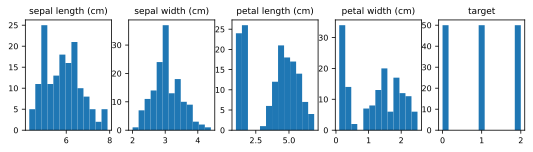

In [28]:
plt.figure(figsize=(9,2))
for (i,v) in enumerate(df.columns):
    plt.subplot(1,df.shape[1],i+1);
    plt.hist(df.iloc[:,i],bins="sqrt")
    plt.title(df.columns[i],fontsize=9);

In [29]:
df.corr().round(2).style.background_gradient(cmap="viridis")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.120000,0.870000,0.820000,0.780000
sepal width (cm),-0.120000,1.000000,-0.430000,-0.370000,-0.430000
petal length (cm),0.870000,-0.430000,1.000000,0.960000,0.950000
petal width (cm),0.820000,-0.370000,0.960000,1.000000,0.960000
target,0.780000,-0.430000,0.950000,0.960000,1.000000


In [30]:
scale = StandardScaler(with_mean=True,with_std=True);
Xo = scale.fit_transform(df.drop(["target"],axis=1).values);

In [31]:
pca = PCA(n_components=0.99)# or set n_components="mle"
X = pca.fit_transform(Xo)
print("Nr. of features after PCA = {} (input = {})".format(X.shape[1],Xo.shape[1]))

Nr. of features after PCA = 3 (input = 4)


In [32]:
y = LabelEncoder().fit_transform(df["target"].values);
[X_train,X_test,y_train,y_test] = train_test_split(X,y,train_size = 0.67,test_size = 0.33,
                                                   stratify=y,random_state=123);

In [33]:
model = KNeighborsClassifier(algorithm="auto");
parameters = {"n_neighbors":[1,3,5],
              "weights":["uniform","distance"]}
model_optim = GridSearchCV(model, parameters, cv=5,scoring="accuracy");

In [34]:
model_optim.fit(X_train,y_train);

In [35]:
model_optim.best_estimator_;

In [36]:
for (i,x,y) in zip(["Train","Test"],[X_train,X_test],[y_train,y_test]):
    print("Classification kNN",i," report:\n",classification_report(y,model_optim.predict(x)))

Classification kNN Train  report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Classification kNN Test  report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.89      1.00      0.94        17

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [37]:
for i in ["most_frequent","uniform"]:
    dummy = DummyClassifier(strategy=i).fit(X_train,y_train);
    print("Classification ",i," test report:",classification_report(y_test,dummy.predict(X_test)))

Classification  most_frequent  test report:               precision    recall  f1-score   support

           0       0.32      1.00      0.48        16
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        17

    accuracy                           0.32        50
   macro avg       0.11      0.33      0.16        50
weighted avg       0.10      0.32      0.16        50

Classification  uniform  test report:               precision    recall  f1-score   support

           0       0.26      0.38      0.31        16
           1       0.26      0.29      0.28        17
           2       0.25      0.12      0.16        17

    accuracy                           0.26        50
   macro avg       0.26      0.26      0.25        50
weighted avg       0.26      0.26      0.25        50



c:\Users\danyl\anaconda3\envs\Apple\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danyl\anaconda3\envs\Apple\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danyl\anaconda3\envs\Apple\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
